In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
%matplotlib inline

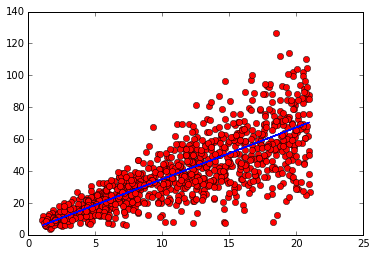

In [43]:
no_samples = 1000 # no of observations
times = (np.random.rand(no_samples)*20)+1 # n samples of 1s-20s recordings
deltas = np.random.normal(0, 1, no_samples) # array of deltas to make the data more natural, according to normal distribution
characters = np.abs(4+(3*times+deltas + deltas*times*1)) # generate the characters/time data

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) 
regr_characters = slope*times+intercept # calculate best-fit linear function

plt.plot(times, characters, 'ro')
plt.plot(times, regr_characters)
plt.show() # visualize


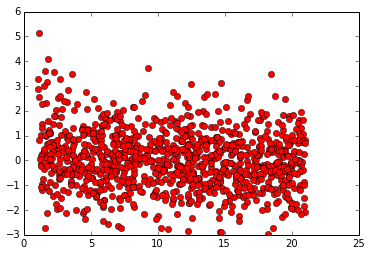

In [44]:
distances = (characters-regr_characters)/times # generate normalized distance from observation to best-fit line
plt.plot(times, distances, 'ro')
plt.show() # visualize

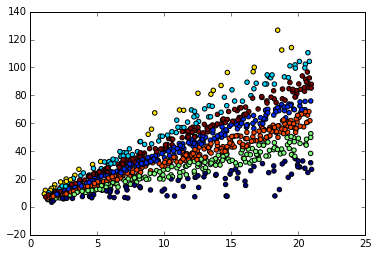

In [45]:
features=np.split(distances, no_samples) # split distances into one element features array
kmeans = KMeans(n_clusters=7, random_state=0).fit(features) # perform k-means clustering
plt.scatter(times, characters, c=kmeans.predict(features).astype(int))
plt.show() # visualize